In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'target',
 'target_filename']

In [2]:
import pandas as pd
df_input=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_target=pd.DataFrame(diabetes.target,columns=['DiseaseProgression'])

In [3]:
df_input
# Here all the variables are in scaled format alredy

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
# Lets check whether it contain any null value or not
print(df_input.isnull().sum())
print()
print(df_target.isnull().sum())
# From below output its clear that given

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

DiseaseProgression    0
dtype: int64


In [5]:
# Lets check the correlation matrix
pd.concat([df_input,df_target],axis=1).corr()
# From below it visible that most of vthe feature have week correlation with target and only some are around 0.5

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [6]:
# Lets describe the datasets
pd.concat([df_input,df_target],axis=1).describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [8]:
# Lets check foroutliers using zscore 
from scipy.stats import zscore
df_combined=pd.concat([df_input,df_target],axis=1)
z_scr=zscore(df_combined)
df_combined_new=df_combined.loc[(abs(z_scr)<3).all(axis=1)]
print(df_combined_new.shape)
# From below output it is clear that some outliers were there and now those are removed

(430, 11)


In [9]:
# Seprating input and output from df_combined_new
df_x=df_combined_new.drop(columns=['DiseaseProgression'])
y=df_combined_new[['DiseaseProgression']]

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred= regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state= r_state
    print('max r2 score corresponding to',final_r_state,'is',max_r_score)
    return final_r_state

In [18]:
# Lets use linear regression and check maxr2 score corresponding to different random state
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state= maxr2_score(lreg,df_x,y)

r2 score corresponding to 42 is 0.3666696589544701
r2 score corresponding to 43 is 0.5414633719716158
r2 score corresponding to 44 is 0.5028302023948108
r2 score corresponding to 45 is 0.41940208977825466
r2 score corresponding to 46 is 0.49944594921344987
r2 score corresponding to 47 is 0.5696168464053883
r2 score corresponding to 48 is 0.489416147899261
r2 score corresponding to 49 is 0.4157614115642506
r2 score corresponding to 50 is 0.5113404267738513
r2 score corresponding to 51 is 0.2535390423428264
r2 score corresponding to 52 is 0.6129709896007236
r2 score corresponding to 53 is 0.41643342507750947
r2 score corresponding to 54 is 0.5374683464284009
r2 score corresponding to 55 is 0.48857235252489806
r2 score corresponding to 56 is 0.31394754546793047
r2 score corresponding to 57 is 0.3987795821170862
r2 score corresponding to 58 is 0.5386412864690377
r2 score corresponding to 59 is 0.439990482153117
r2 score corresponding to 60 is 0.47232409291236555
r2 score corresponding to 6

In [19]:
# Lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors= {'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors, cv=10)
gknr.fit(df_x,y)
gknr.best_params_

{'n_neighbors': 19}

In [20]:
# Lets use KNN regression and check max r2 score corresponding to different random state
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,df_x,y)

r2 score corresponding to 42 is 0.3754639421781797
r2 score corresponding to 43 is 0.4850176749925311
r2 score corresponding to 44 is 0.5070124907462026
r2 score corresponding to 45 is 0.34696634001528726
r2 score corresponding to 46 is 0.451542905441379
r2 score corresponding to 47 is 0.4895196971602195
r2 score corresponding to 48 is 0.4958809239179024
r2 score corresponding to 49 is 0.42630690730410414
r2 score corresponding to 50 is 0.45313119612132746
r2 score corresponding to 51 is 0.2678001378172621
r2 score corresponding to 52 is 0.5358847489904657
r2 score corresponding to 53 is 0.4586727843601762
r2 score corresponding to 54 is 0.46474045120456287
r2 score corresponding to 55 is 0.41518128514327657
r2 score corresponding to 56 is 0.33146594793420947
r2 score corresponding to 57 is 0.41031633084078845
r2 score corresponding to 58 is 0.5402584419605948
r2 score corresponding to 59 is 0.42953599823241373
r2 score corresponding to 60 is 0.46738745945600657
r2 score corresponding 

In [22]:
# Lets check the mean r2_score of both Linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,df_x,y,cv=5,scoring='r2').mean())
print('Standard deviatiion in r2 score for Linear Regression:',cross_val_score(lreg,df_x,y,cv=5,scoring='r2').std())
print()
print('Mean r2 score for KNN Regression:',cross_val_score(knr,df_x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression:',cross_val_score(knr,df_x,y,cv=5,scoring='r2').std())
# Based on below output linear Regression is performing well

Mean r2 score for Linear Regression: 0.4676911221693185
Standard deviatiion in r2 score for Linear Regression: 0.05595217785841951

Mean r2 score for KNN Regression: 0.4447393304649888
Standard deviation in r2 score for KNN Regression: 0.06885364198445655


In [24]:
# Lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(df_x,y)
clf.best_params_

{'alpha': 0.1}

In [25]:
# Lets check max r2 score when we use Lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,df_x,y)

r2 score corresponding to 42 is 0.39559614133403787
r2 score corresponding to 43 is 0.5279704191720399
r2 score corresponding to 44 is 0.50503294565865
r2 score corresponding to 45 is 0.40361967977614077
r2 score corresponding to 46 is 0.5035821455123144
r2 score corresponding to 47 is 0.5557723339863485
r2 score corresponding to 48 is 0.4951902457271491
r2 score corresponding to 49 is 0.41898867700436127
r2 score corresponding to 50 is 0.4841336844871693
r2 score corresponding to 51 is 0.2705971586987356
r2 score corresponding to 52 is 0.5965279705889219
r2 score corresponding to 53 is 0.4227011451196119
r2 score corresponding to 54 is 0.514897039321015
r2 score corresponding to 55 is 0.4921979652112449
r2 score corresponding to 56 is 0.3249514143291744
r2 score corresponding to 57 is 0.41824855781541936
r2 score corresponding to 58 is 0.5438396084200854
r2 score corresponding to 59 is 0.44859182287998944
r2 score corresponding to 60 is 0.4998521969434332
r2 score corresponding to 61 

In [30]:
# Lets use cross val score with Lasso
print('Mean r2 score for Lasso Regression:',cross_val_score(lsreg,df_x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Lasso Regression:',cross_val_score(lsreg,df_x,y,cv=5,scoring='r2').std())
# Based on below output i can say lasso performed just like Linear Regression

Mean r2 score for Lasso Regression: 0.4668358456202258
Standard deviation in r2 score for Lasso Regression: 0.05024883603439511


In [33]:
# now we will try to use gradient boosting technique
# for getting best set of parameters we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf= GridSearchCV(gbr,parameters,cv=5)
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [34]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print('Mean r2 score for gradient boosting Regression:',cross_val_score(gbr,df_x,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,df_x,y,cv=5,scoring='r2').std())

Mean r2 score for gradient boosting Regression: 0.4085285439473111
standard deviation in r2 score for Gradient Boosting Regression: 0.0752308478147571


In [36]:
# now Lets use add boost regression algorithm 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(df_x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.01,
 'n_estimators': 100}

In [37]:
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.001,n_estimators=100)
print('Mean r2 score for Ada Boosting regression:',cross_val_score(ada_reg,df_x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for ada Boosting Regression:',cross_val_score(ada_reg,df_x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boosting regression: 0.46691002065355197
Standard deviation in r2 score for ada Boosting Regression: 0.050200034827851334


In [38]:
# Lets check maximum r2 score corresponding to this
r_state=maxr2_score(ada_reg,df_x,y)

r2 score corresponding to 42 is 0.39637812687426
r2 score corresponding to 43 is 0.5323227366966515
r2 score corresponding to 44 is 0.510077019248199
r2 score corresponding to 45 is 0.4070483956352876
r2 score corresponding to 46 is 0.5032602308161429
r2 score corresponding to 47 is 0.5617237019345656
r2 score corresponding to 48 is 0.49894716430752206
r2 score corresponding to 49 is 0.42143459531068295
r2 score corresponding to 50 is 0.4913467850569432
r2 score corresponding to 51 is 0.271143701528037
r2 score corresponding to 52 is 0.5992572646811488
r2 score corresponding to 53 is 0.4181154887186944
r2 score corresponding to 54 is 0.512515963631031
r2 score corresponding to 55 is 0.49307549090856073
r2 score corresponding to 56 is 0.3223358362826807
r2 score corresponding to 57 is 0.4159933361100264
r2 score corresponding to 58 is 0.540537800843643
r2 score corresponding to 59 is 0.4451135083463278
r2 score corresponding to 60 is 0.49743586511877025
r2 score corresponding to 61 is 0

In [39]:
# We tried the models and till now linear regression in the best
# random state corresponding to higest r2 score is 99
x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=99,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [41]:
# Lets find the rsme and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is:',r2_score(y_test,y_pred))

RMSE is: 48.95593018443329
r2_score is: 0.6269516531714291


In [42]:
from sklearn.externals import joblib
# Save the model as a pickle in a file
joblib.dump(lreg,'diabetes_prog_lreg.pkl')

['diabetes_prog_lreg.pkl']

# Bank Note

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('banknote.csv')

In [45]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [46]:
df.shape

(1372, 5)

In [47]:
df.columns

Index(['variance', ' skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [48]:
df.isnull().sum()

variance     0
 skewness    0
curtosis     0
entropy      0
class        0
dtype: int64

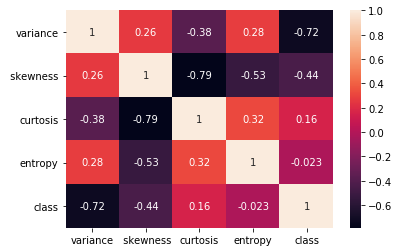

In [49]:
sns.heatmap(df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C74C05F0C8>,
      dtype=object)

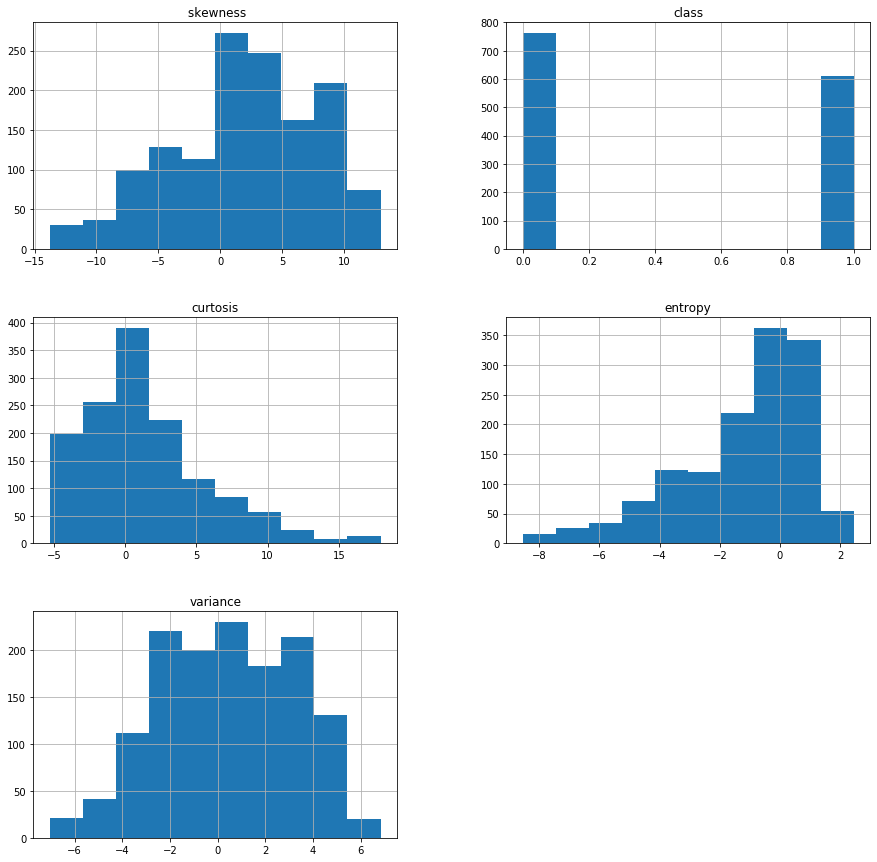

In [50]:
df.hist(figsize=(15,15))

In [51]:
x=df.iloc[:,:-1]
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [53]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9,stratify=y)

In [56]:
print(x_train.shape,x_test.shape)

(960, 4) (412, 4)


In [57]:
print(y_train.shape,y_test.shape)

(960,) (412,)


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [61]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [63]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [64]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

************ KNeighborsClassifier **********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 1.0


Cross_Val_Score= 0.9985401459854014


roc_auc_score= 1.0


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



[[229   0]
 [  0 183]]





************ SVC **********


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy_score= 1.0



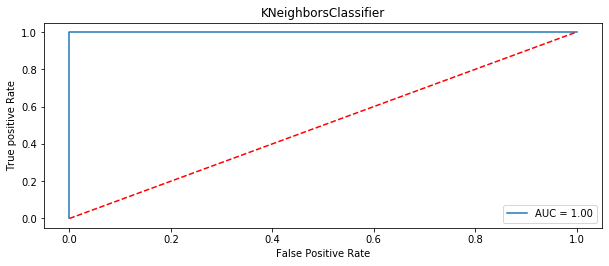

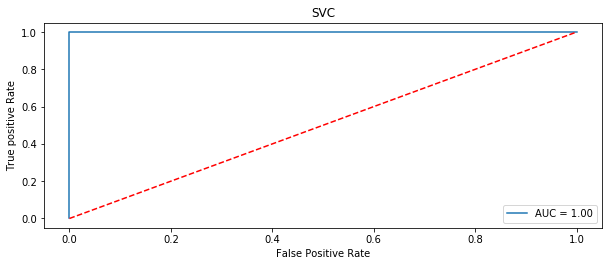

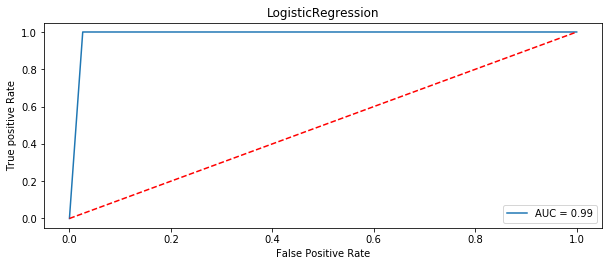

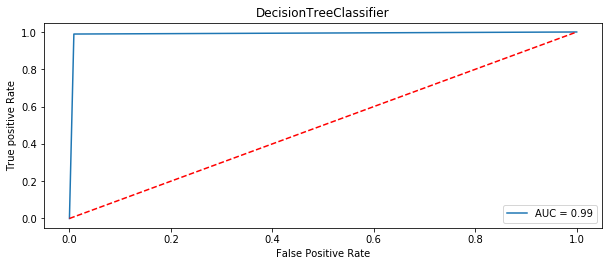

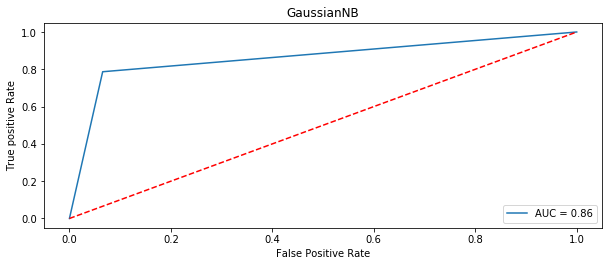

In [67]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('************',name,'**********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [69]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,100.000000,99.854015,100.000000
1,SVC,100.000000,100.000000,100.000000
2,LogisticRegression,98.543689,98.104306,98.689956
3,DecisionTreeClassifier,99.029126,98.541733,99.016871
4,GaussianNB,86.893204,84.107691,86.069153


In [70]:
from sklearn.externals import joblib

In [72]:
joblib.dump(SV,'Model_BanknoteAuthentication.csv')

['Model_BanknoteAuthentication.csv']

In [73]:
model=joblib.load('Model_BanknoteAuthentication.csv')

In [74]:
model.predict(x_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,